# Decision Tree Regressor Air Quality Index Prediction¶

In [16]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df=pd.read_csv('E:/AQI/Data/Real-Data/Real_Combine.csv')

In [18]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


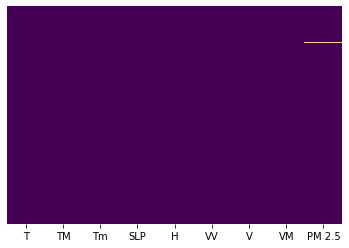

In [19]:

## Check for null values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
df=df.dropna()

In [21]:

X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1]

In [22]:
## check null values
X.isnull()

,T,TM,Tm,SLP,H,VV,V,VM
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1088,False,False,False,False,False,False,False,False
1089,False,False,False,False,False,False,False,False
1090,False,False,False,False,False,False,False,False
1091,False,False,False,False,False,False,False,False


In [23]:
y.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1088    False
1089    False
1090    False
1091    False
1092    False
Name: PM 2.5, Length: 1092, dtype: bool

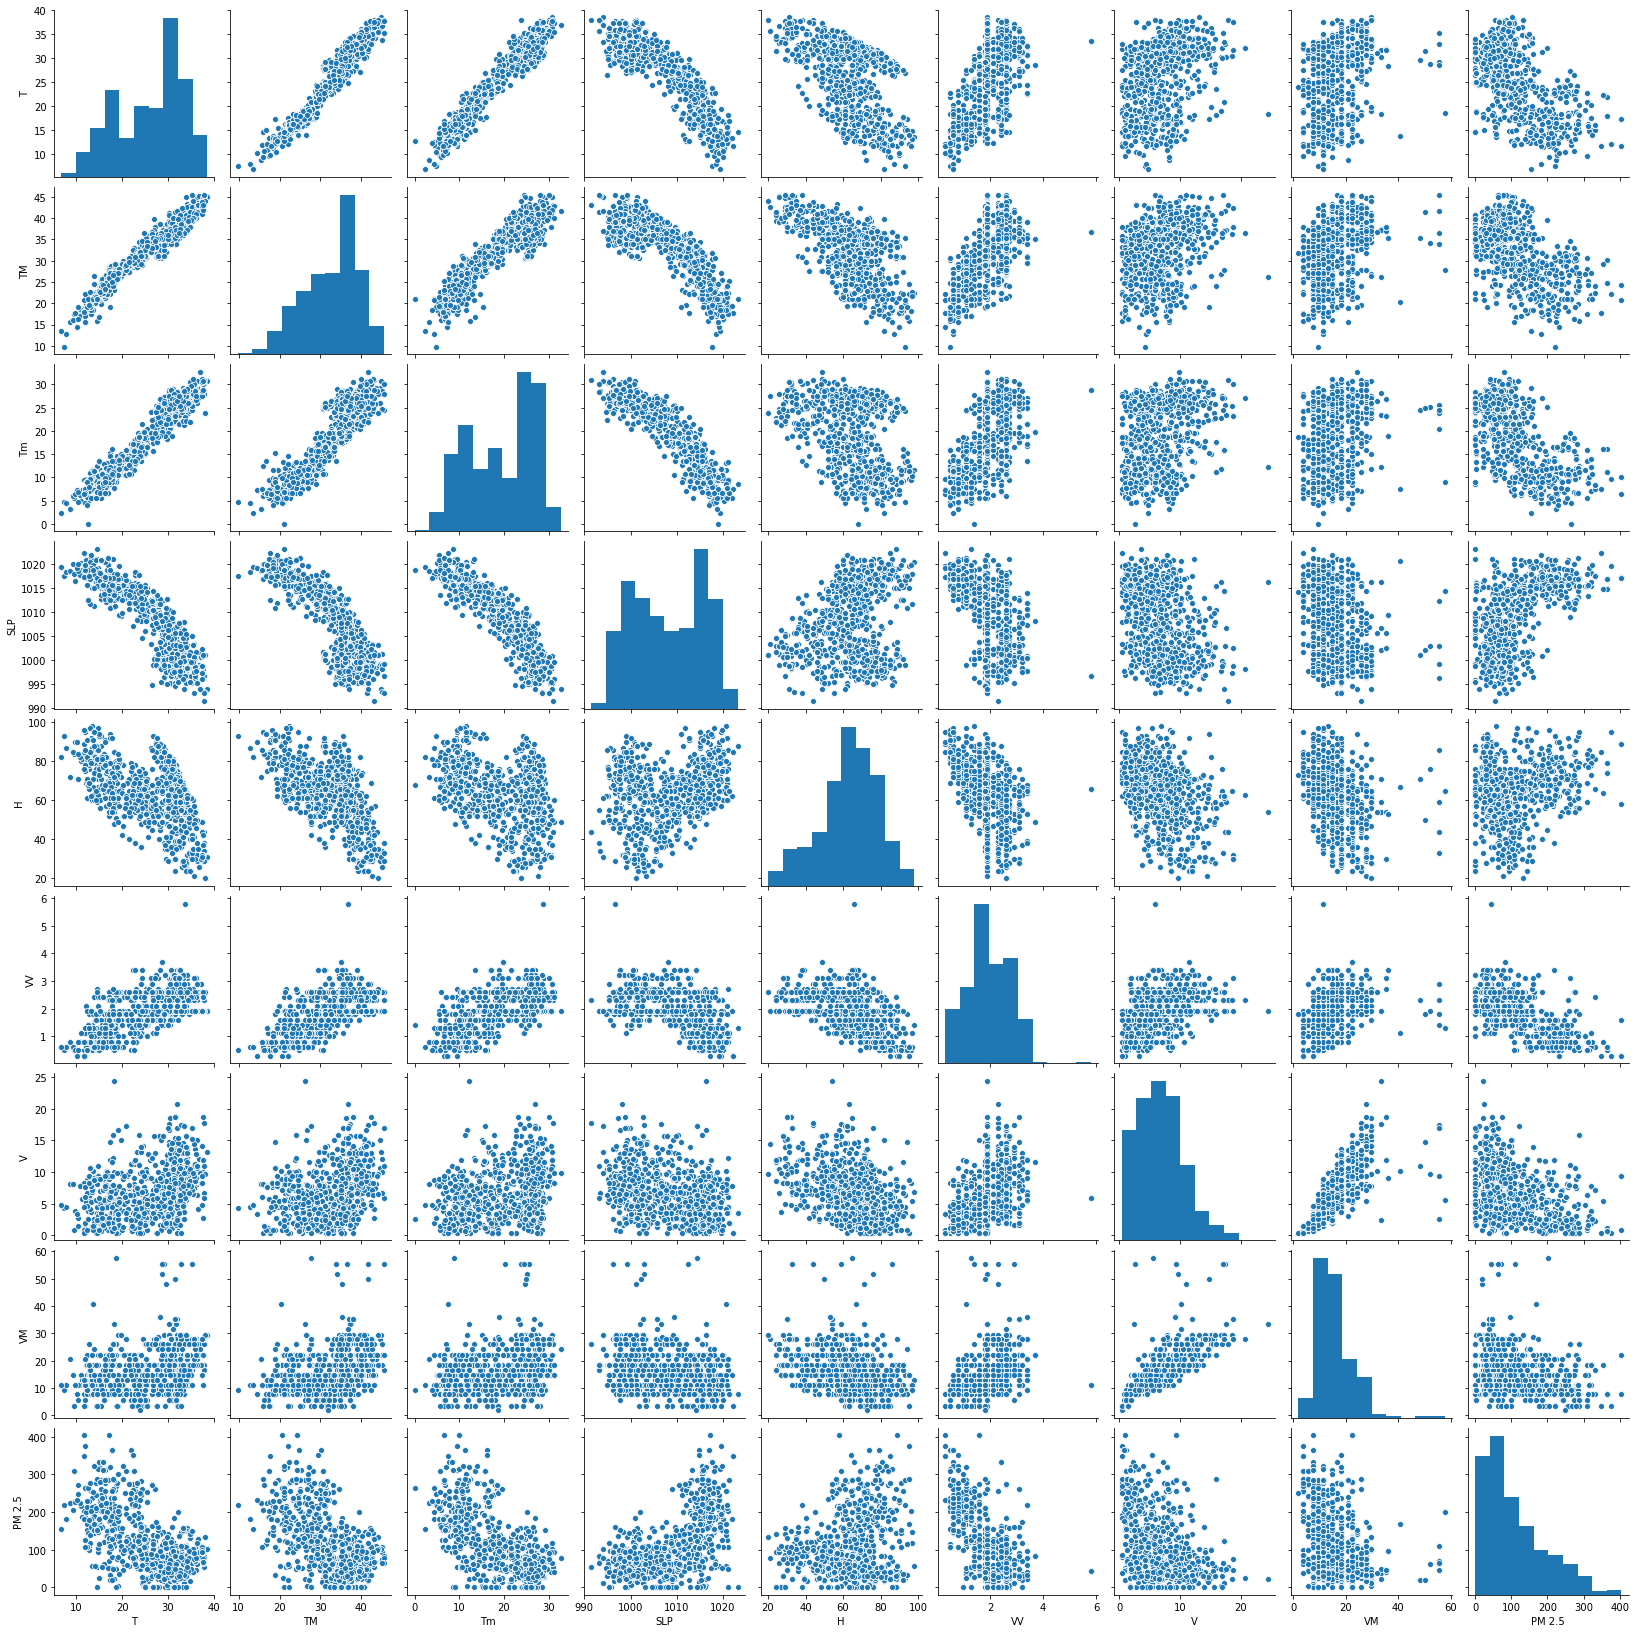

In [24]:
sns.pairplot(df)

In [25]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967536,0.953719,-0.881409,-0.509299,0.640792,0.301994,0.287738,-0.631462
TM,0.967536,1.000000,0.892031,-0.822958,-0.586681,0.606945,0.292949,0.297011,-0.568409
Tm,0.953719,0.892031,1.000000,-0.917518,-0.287357,0.577240,0.296225,0.266782,-0.673824
SLP,-0.881409,-0.822958,-0.917518,1.000000,0.240256,-0.517915,-0.329838,-0.310704,0.623187
H,-0.509299,-0.586681,-0.287357,0.240256,1.000000,-0.465374,-0.380575,-0.362177,0.138005
VV,0.640792,0.606945,0.577240,-0.517915,-0.465374,1.000000,0.376873,0.342442,-0.573941
V,0.301994,0.292949,0.296225,-0.329838,-0.380575,0.376873,1.000000,0.775655,-0.268530
VM,0.287738,0.297011,0.266782,-0.310704,-0.362177,0.342442,0.775655,1.000000,-0.215854
PM 2.5,-0.631462,-0.568409,-0.673824,0.623187,0.138005,-0.573941,-0.268530,-0.215854,1.000000


# Correlation Matrix with Heatmap


Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

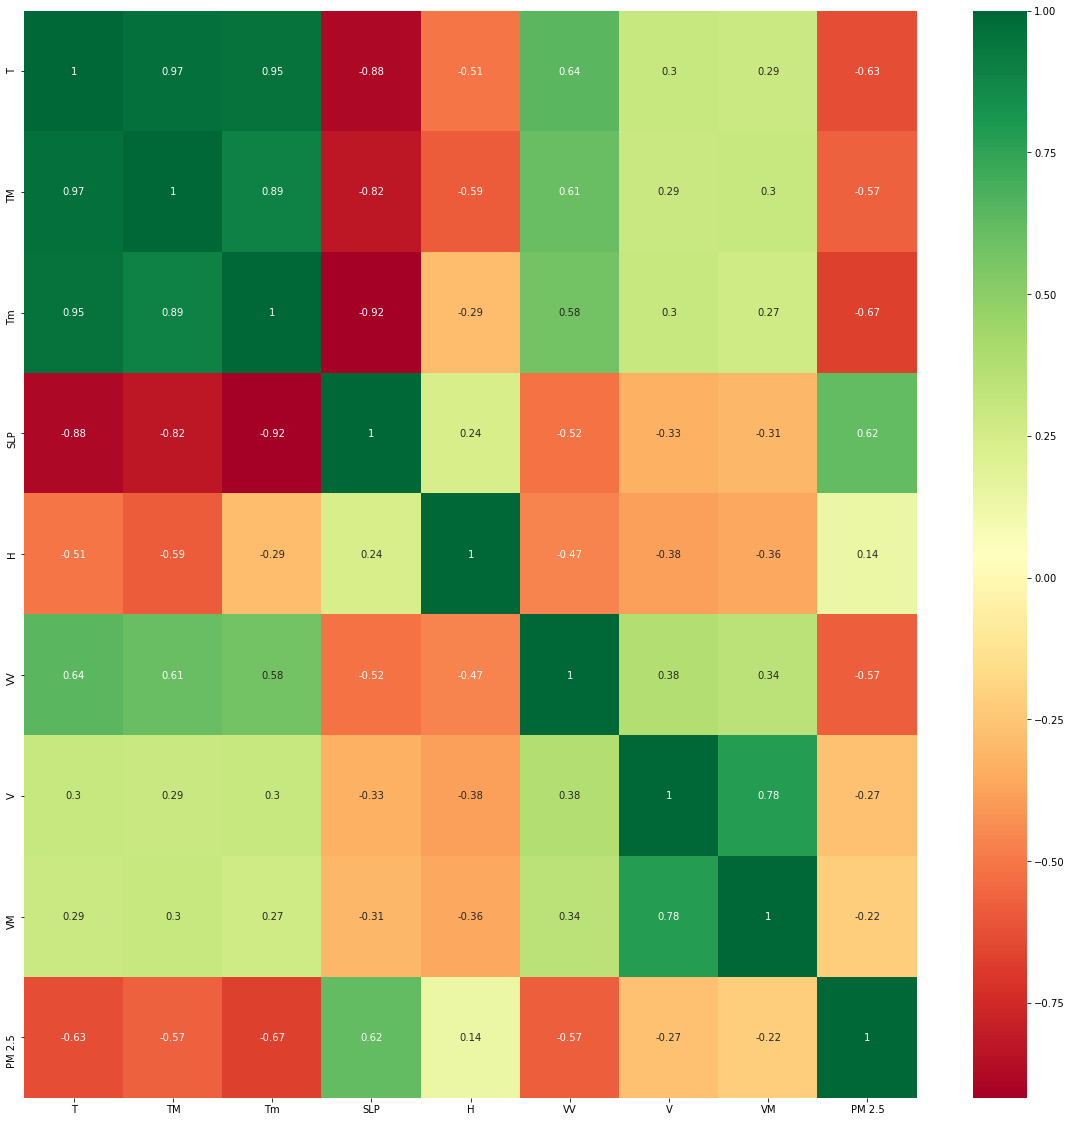

In [26]:

import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [27]:
corrmat.index

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

# Feature Importance


You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [28]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [29]:
print(model.feature_importances_)

[0.19223568 0.1026645  0.20956852 0.11849243 0.08800045 0.19423003
 0.052501   0.0423074 ]


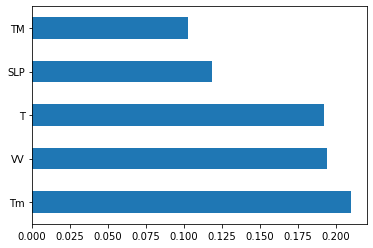

In [30]:

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

# Decision Tree Regressor

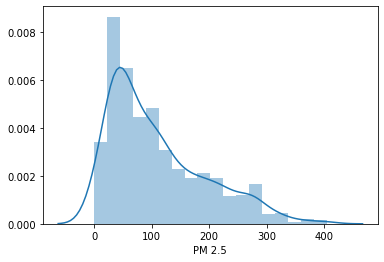

In [31]:
sns.distplot(y)

# Train Test split

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [45]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor(criterion='mse')

In [46]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [48]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtree.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 1.0


In [49]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtree.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.6735028982815456


In [50]:
from sklearn.model_selection import cross_val_score

In [51]:
score=cross_val_score(dtree,X,y,cv=5)

In [52]:
score.mean()

0.43919295713310297

# Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute thi

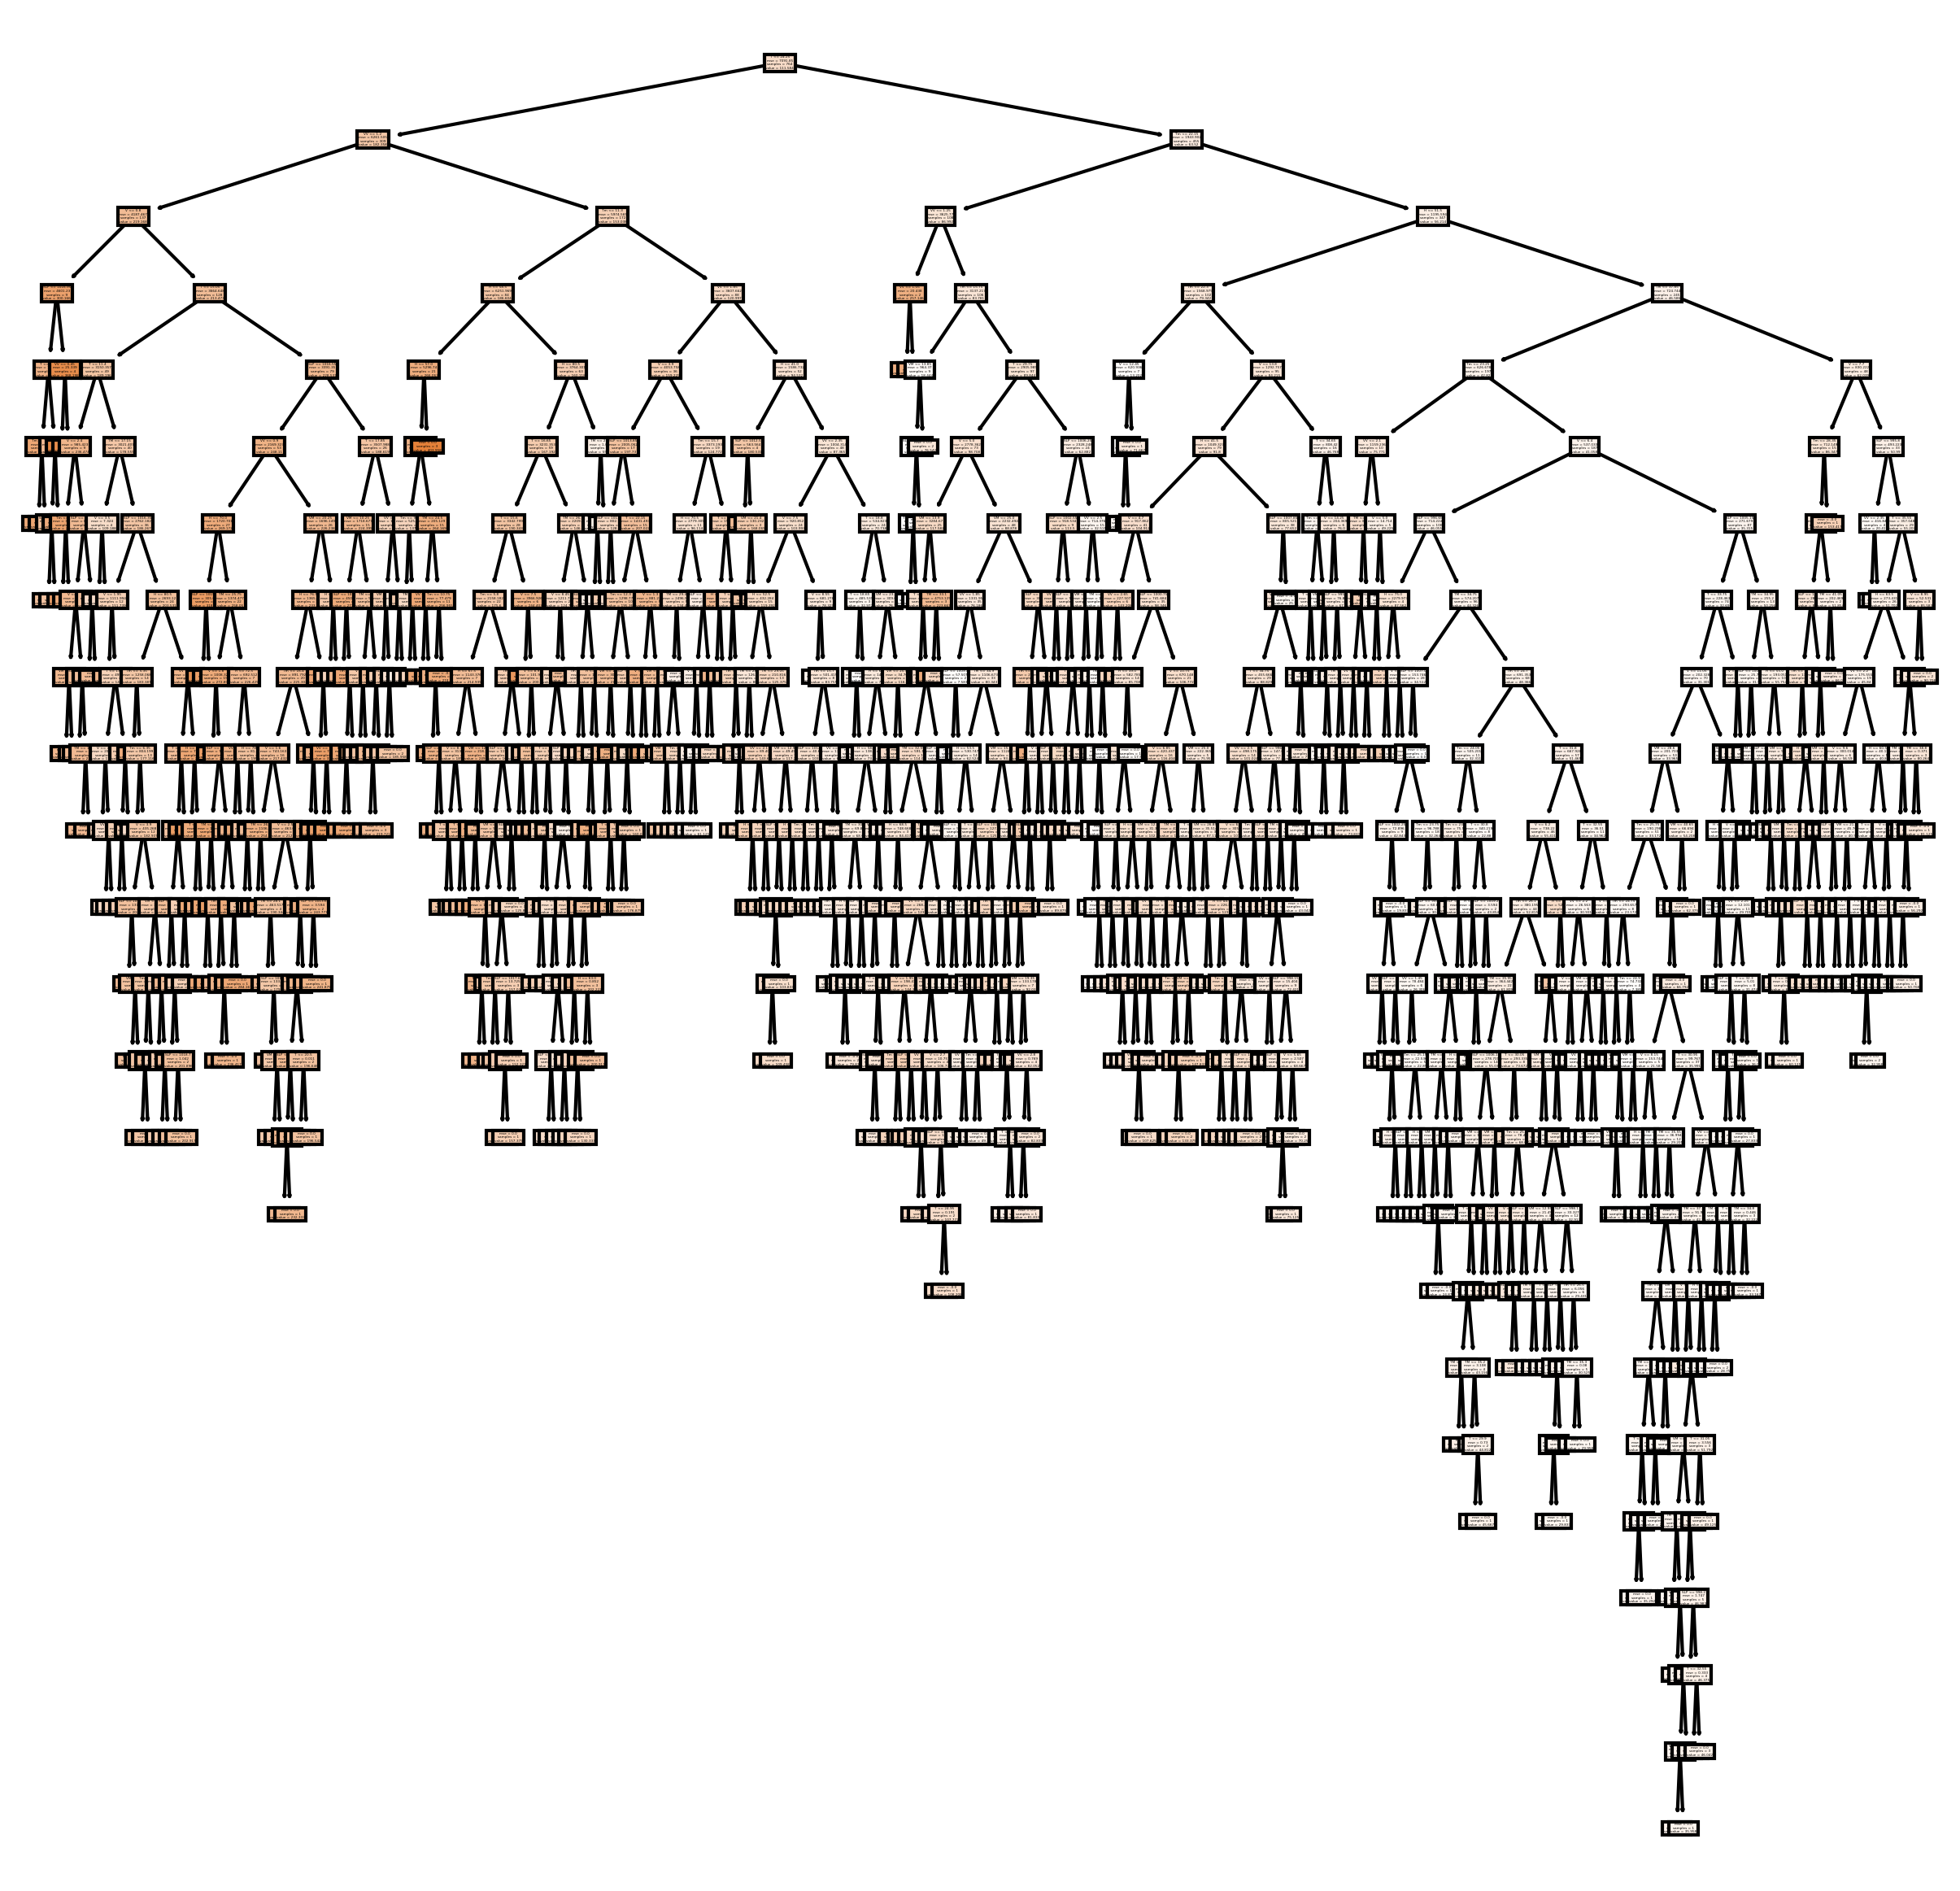

In [69]:
from sklearn import tree
fn=list(df.columns[:-1])
cn=list(df.columns[-1])

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)

tree.plot_tree(dtree,
           feature_names = fn,class_names=cn,
           filled = True);

fig.savefig('imagename.png')

# Model Evaluation

In [70]:
prediction=dtree.predict(X_test)

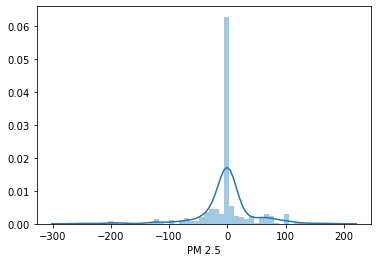

In [71]:

sns.distplot(y_test-prediction)


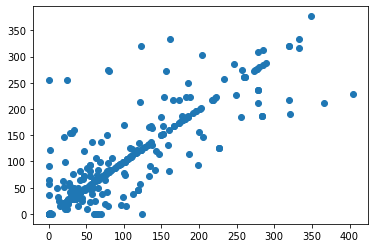

In [72]:
plt.scatter(y_test,prediction)

# Hyperparameter Tuning Decision Tree Regressor

In [73]:

## Hyper Parameter Optimization

params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}


In [74]:
from sklearn.model_selection import GridSearchCV

In [77]:
Grid_search=GridSearchCV(dtree,params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [78]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))
    

In [80]:

from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
Grid_search.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 952 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 3512 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done 7096 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 11704 tasks      | elapsed:   50.7s
[Parallel(n_jobs=-1)]: Done 17336 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 23992 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 31672 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 40376 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 50104 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 60856 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 72632 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 85432 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 99256 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 102400


 Time taken: 0 hours 4 minutes and 37.69 seconds.


In [82]:

Grid_search.best_params_

{'max_depth': 8,
 'max_features': 'auto',
 'max_leaf_nodes': 10,
 'min_samples_leaf': 4,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [83]:

Grid_search.best_score_

-3131.6489619178874

In [84]:
predictions=Grid_search.predict(X_test)

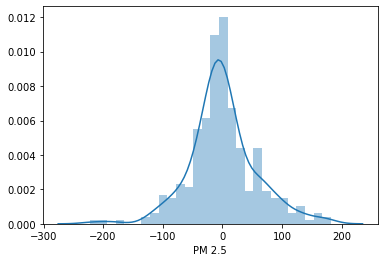

In [85]:
sns.distplot(y_test-predictions)

In [87]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 40.14163092473942
MSE: 3171.808145980198
RMSE: 56.31880810155874


# Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Mean Squared Error (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because we want to minimize them.

In [88]:

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 24.57715955284553
MSE: 2338.9603909425814
RMSE: 48.36279965988923


In [89]:
import pickle

In [90]:
file_name='Descison_tree.sav'

In [92]:
pickle.dump(Grid_search,open(file_name,'wb'))

In [103]:
prediction[2]

279.6

In [102]:
predictions[1]

178.35218926553674

In [100]:
y_test

785    104.625000
742    125.891667
748    279.600000
986    110.416667
480     31.333333
          ...    
492     44.125000
62     142.500000
79      65.166667
300     22.333333
194      0.000000
Name: PM 2.5, Length: 328, dtype: float64